In [1]:
import pandas as pd
import numpy as np

In [2]:
bluetooth = pd.read_csv('../inputCSVs/bluetooth.csv')

In [3]:
bluetooth.shape

(80148, 4)

In [4]:
# Check the missing values in df
null_values=bluetooth.isna().sum()


In [5]:
null_values

Unnamed: 0    0
product_Id    0
rating        0
reviews       0
dtype: int64

In [6]:
bluetooth.shape

(80148, 4)

In [7]:
!pip3 install gensim
!pip3 install pyldavis
!pip3 install nltk
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install textblob
!pip3 install spacy
!python3 -m spacy download en 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samridhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

In [10]:
# a function that provides the most frequent words with count on a plot
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  print(d)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [11]:
bluetooth['reviews']

0        I am from Brazil and I purchased headset at circuit city in my last trip .On ActionTec site the prereqs -LRB- working with all bluetooth devices -RRB- . Paired it with my nokia 3650 , and could n'...
1        I bought this bluetooth headset because of the comments on Actiontec website .However it gives so much problems with my Sony t68i .Sometimes the phone would ring and I press the answer button on t...
2        Super lightweight and tiny .Sound quality is okay on both ends .One person told me it sounded better than my phone .Another said I sounded like I was in a tin can .Earpiece volume was loud ; quali...
3        I bought this to work with my T608 phone , I was able to get it to pair with the phone fine .When using it with bluetooth as on I can voice dial but it often does not get the correct number .When ...
4        I recently purchased this item and so far it works as advertized .I had to setup it up as a BT Headset instead of just paiing it with my phone .The sound q

        word   count
17       the  435795
31         ,  320356
35        to  254786
4        and  247716
0          I  246113
28        it  210760
135        a  210421
78        is  168447
11        my  125723
54        of  115098
282      for  113363
95        .I  105684
21      with  102136
245     that   97971
60        on   95917
26         .   94085
10        in   90607
57      this   86430
480     have   83322
96       not   71205
424      you   70741
102      but   68321
41       was   67173
33       n't   65509
6    headset   58646
183     .The   58142
71     phone   48884
205       as   48462
165      ear   48022
82       are   46380


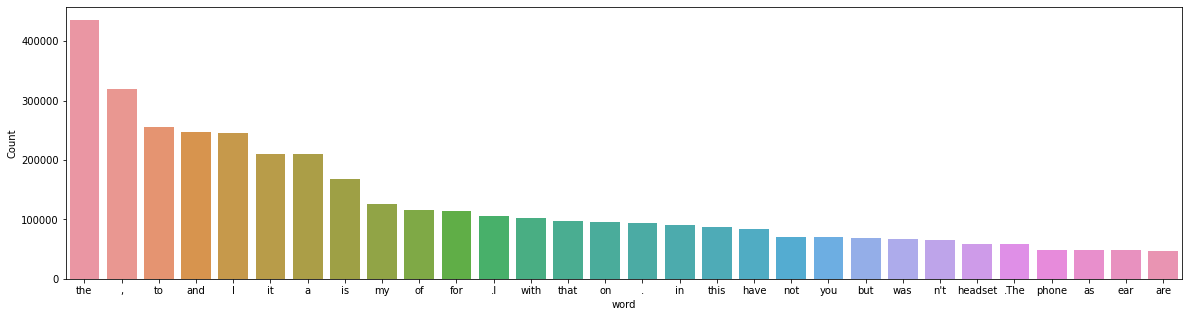

In [12]:
freq_words(bluetooth['reviews'])

In [13]:
# replace "n't" with " not"
bluetooth['reviews']= bluetooth['reviews'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
bluetooth['reviews'] = bluetooth['reviews'].str.replace("[^a-zA-Z#]", " ")

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/1503863097.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  bluetooth['reviews'] = bluetooth['reviews'].str.replace("[^a-zA-Z#]", " ")


In [14]:
bluetooth['reviews']

0        I am from Brazil and I purchased headset at circuit city in my last trip  On ActionTec site the prereqs  LRB  working with all bluetooth devices  RRB    Paired it with my nokia        and could  n...
1        I bought this bluetooth headset because of the comments on Actiontec website  However it gives so much problems with my Sony t  i  Sometimes the phone would ring and I press the answer button on t...
2        Super lightweight and tiny  Sound quality is okay on both ends  One person told me it sounded better than my phone  Another said I sounded like I was in a tin can  Earpiece volume was loud   quali...
3        I bought this to work with my T    phone   I was able to get it to pair with the phone fine  When using it with bluetooth as on I can voice dial but it often does not get the correct number  When ...
4        I recently purchased this item and so far it works as advertized  I had to setup it up as a BT Headset instead of just paiing it with my phone  The sound q

        word   count
17       the  437294
0          I  360446
32        to  255262
4        and  248212
27        it  210887
130        a  210766
75        is  168492
30       not  136801
11        my  125759
51        of  115303
279      for  113399
21      with  102165
57        on   98529
242     that   97985
10        in   93018
54      this   86450
460     have   83362
178      The   71174
409      you   70781
97       but   68347
38       was   67194
6    headset   58884
159      ear   51339
68     phone   49457
202       as   48498
79       are   46395
25       RRB   45336
220        s   45002
240     they   42522
276    sound   42467


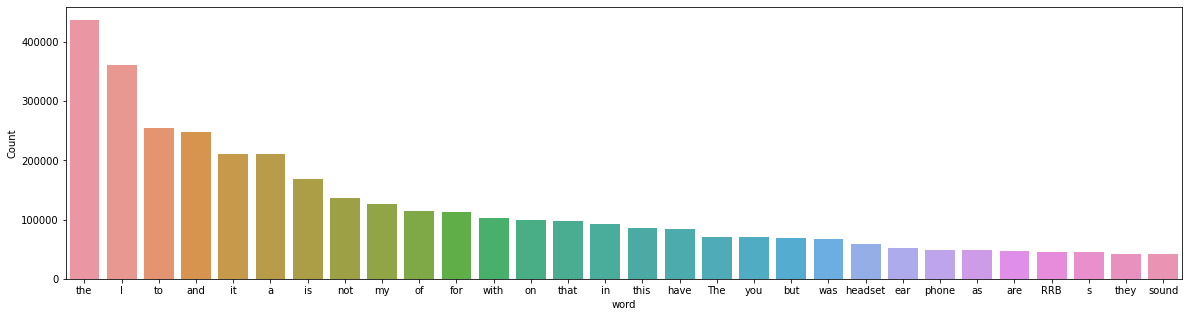

In [15]:
freq_words(bluetooth['reviews'])

#### Checking stopwords in the reviews

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [17]:
# Checking the number of stopwords in each review
bluetooth['stopwords'] = bluetooth['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
bluetooth[['reviews','stopwords']].head()

,reviews,stopwords
0,I am from Brazil and I purchased headset at circuit city in my last trip On ActionTec site the prereqs LRB working with all bluetooth devices RRB Paired it with my nokia and could n...,29
1,I bought this bluetooth headset because of the comments on Actiontec website However it gives so much problems with my Sony t i Sometimes the phone would ring and I press the answer button on t...,56
2,Super lightweight and tiny Sound quality is okay on both ends One person told me it sounded better than my phone Another said I sounded like I was in a tin can Earpiece volume was loud quali...,100
3,I bought this to work with my T phone I was able to get it to pair with the phone fine When using it with bluetooth as on I can voice dial but it often does not get the correct number When ...,64
4,I recently purchased this item and so far it works as advertized I had to setup it up as a BT Headset instead of just paiing it with my phone The sound quality is not that great but it makes up...,32


In [18]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [19]:
bluetooth['reviews']

0        I am from Brazil and I purchased headset at circuit city in my last trip  On ActionTec site the prereqs  LRB  working with all bluetooth devices  RRB    Paired it with my nokia        and could  n...
1        I bought this bluetooth headset because of the comments on Actiontec website  However it gives so much problems with my Sony t  i  Sometimes the phone would ring and I press the answer button on t...
2        Super lightweight and tiny  Sound quality is okay on both ends  One person told me it sounded better than my phone  Another said I sounded like I was in a tin can  Earpiece volume was loud   quali...
3        I bought this to work with my T    phone   I was able to get it to pair with the phone fine  When using it with bluetooth as on I can voice dial but it often does not get the correct number  When ...
4        I recently purchased this item and so far it works as advertized  I had to setup it up as a BT Headset instead of just paiing it with my phone  The sound q

#### Checking punctuation present in the reviews

In [20]:
import string
nltk.download('punkt')
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

bluetooth['punctuation'] = bluetooth['reviews'].apply(lambda x: count_punctuation(x))


[nltk_data] Downloading package punkt to /Users/samridhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
bluetooth[['reviews','punctuation']]

,reviews,punctuation
0,I am from Brazil and I purchased headset at circuit city in my last trip On ActionTec site the prereqs LRB working with all bluetooth devices RRB Paired it with my nokia and could n...,0
1,I bought this bluetooth headset because of the comments on Actiontec website However it gives so much problems with my Sony t i Sometimes the phone would ring and I press the answer button on t...,0
2,Super lightweight and tiny Sound quality is okay on both ends One person told me it sounded better than my phone Another said I sounded like I was in a tin can Earpiece volume was loud quali...,0
3,I bought this to work with my T phone I was able to get it to pair with the phone fine When using it with bluetooth as on I can voice dial but it often does not get the correct number When ...,0
4,I recently purchased this item and so far it works as advertized I had to setup it up as a BT Headset instead of just paiing it with my phone The sound quality is not that great but it makes up...,0
...,...,...
80143,Update EditIn response to users stating on the ear pad design is common among noise cancelling LRB NC RRB headphones Although I do agree that on the ear padding is very effective for NC c...,0
80144,Had previous somewhat lower price non Bluetooth version from Costco LRB Sony MDR RDC RRB Awesome noise cancellation comfort Really wanted B tooth so bought these from Sony Direct ...,1
80145,these sound fine I do not know what to compare with honestly I m living next to a massive construction site and wanted something I could wear around the apartment so as to not go crazy The no...,1
80146,I really love them They work exactly as described My only complaint is that they did not come with a case so I am using one from a different brand I have,0


#### Checking hastags present in the review text

In [22]:
bluetooth['hastags'] = bluetooth['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
bluetooth['hastags'].sum()

9605

In [23]:
bluetooth.hastags.loc[bluetooth.hastags != 0].count()

3364

#### Checking numerics from the reviews

In [24]:
bluetooth['numerics'] = bluetooth['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
bluetooth['numerics'].sum()

0

#### Checking the words which are in uppercase, which may be significant

In [25]:
bluetooth['upper'] = bluetooth['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
bluetooth['reviews'][bluetooth['upper'] > 1].count()

65002

In [26]:
bluetooth['reviews']

0        I am from Brazil and I purchased headset at circuit city in my last trip  On ActionTec site the prereqs  LRB  working with all bluetooth devices  RRB    Paired it with my nokia        and could  n...
1        I bought this bluetooth headset because of the comments on Actiontec website  However it gives so much problems with my Sony t  i  Sometimes the phone would ring and I press the answer button on t...
2        Super lightweight and tiny  Sound quality is okay on both ends  One person told me it sounded better than my phone  Another said I sounded like I was in a tin can  Earpiece volume was loud   quali...
3        I bought this to work with my T    phone   I was able to get it to pair with the phone fine  When using it with bluetooth as on I can voice dial but it often does not get the correct number  When ...
4        I recently purchased this item and so far it works as advertized  I had to setup it up as a BT Headset instead of just paiing it with my phone  The sound q

#### Cleaning steps

In [27]:


# remove short words whose (length < 3)
bluetooth['reviews'] = bluetooth['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing puctuations
bluetooth['reviews'] = bluetooth['reviews'].str.replace('[^\w\s]','')
bluetooth['reviews'].head()

# make entire review text lowercase
reviews = [r.lower() for r in bluetooth['reviews']]

# remove stopwords from the reviews
reviews = [remove_stopwords(r.split()) for r in reviews]




<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/1015003539.py:5: DeprecationWarning: invalid escape sequence \w
  bluetooth['reviews'] = bluetooth['reviews'].str.replace('[^\w\s]','')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/1015003539.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  bluetooth['reviews'] = bluetooth['reviews'].str.replace('[^\w\s]','')


In [28]:
bluetooth['reviews']

0        from Brazil and purchased headset circuit city last trip ActionTec site the prereqs LRB working with all bluetooth devices RRB Paired with nokia and could not connect the headset after pairing Cal...
1        bought this bluetooth headset because the comments Actiontec website However gives much problems with Sony Sometimes the phone would ring and press the answer button the headset and the call disco...
2        Super lightweight and tiny Sound quality okay both ends One person told sounded better than phone Another said sounded like was tin can Earpiece volume was loud quality good adjustable boom the mi...
3        bought this work with phone was able get pair with the phone fine When using with bluetooth can voice dial but often does not get the correct number When using talk people they often say that they...
4        recently purchased this item and far works advertized had setup Headset instead just paiing with phone The sound quality not that great but makes for that 

           word  count
2       headset  61698
106         ear  52103
41        phone  50416
74        sound  47693
14          rrb  45336
12    bluetooth  45031
78          one  44061
10          lrb  41541
104         use  40894
89         good  40621
187       great  38239
42        would  33971
75      quality  33912
84         like  30568
265        well  26833
464  headphones  25107
53          get  24259
195        time  23835
153        work  22390
379     battery  22348
196     product  21637
848       music  19231
55         also  19224
166        hear  18592
192        even  18159
182       works  17846
125      device  17717
17        could  17413
87       volume  17188
338      really  17073
81       better  16002
47         call  15919
383        easy  15873
239        used  15720
70        using  15650


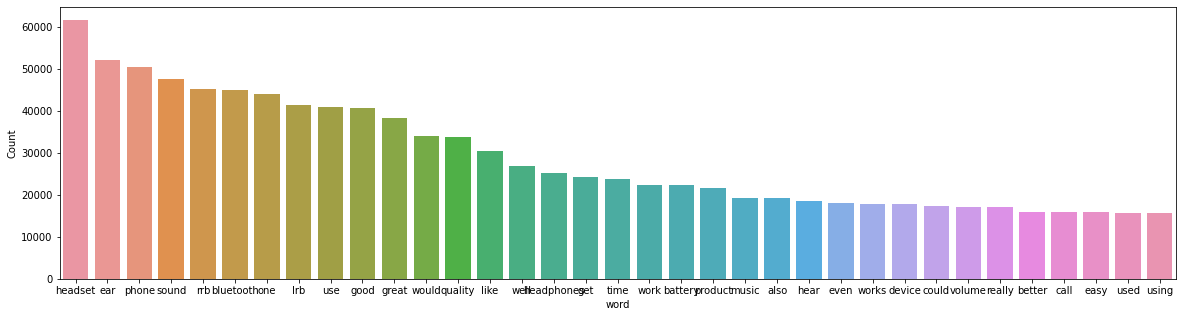

In [29]:
freq_words(reviews, 35)

In [30]:
# !pip3 install -U spacy
# !python3 -m spacy download en 
import spacy
# en_core_web_sm

In [31]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [32]:
import pandas as pd
stemmer = SnowballStemmer("english")
# reviews_3 = [stemmer.stem(plural) for plural in original_words]

def stemming_and_lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [33]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['bought', 'bluetooth', 'headset', 'comments', 'actiontec', 'website', 'however', 'gives', 'much', 'problems', 'sony', 'sometimes', 'phone', 'would', 'ring', 'press', 'answer', 'button', 'headset', 'call', 'disconnected', 'still', 'times', 'trying', 'call', 'someone', 'headset', 'get', 'signal', 'also', 'reception', 'poor', 'sure', 'problem', 'connecting', 'sony', 'phones', 'nothing', 'trouble', 'giving', 'purchasing', 'sony', 'soon', 'continue', 'testing', 'right', 'using', 'headset']


In [34]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['bought', 'bluetooth', 'headset', 'comments', 'actiontec', 'website', 'however', 'gives', 'much', 'problems', 'sony', 'sometimes', 'phone', 'would', 'ring', 'press', 'answer', 'button', 'headset', 'call', 'disconnected', 'still', 'times', 'trying', 'call', 'someone', 'headset', 'get', 'signal', 'also', 'reception', 'poor', 'sure', 'problem', 'connecting', 'sony', 'phones', 'nothing', 'trouble', 'giving', 'purchasing', 'sony', 'soon', 'continue', 'testing', 'right', 'using', 'headset']


48

In [35]:
reviews_2 = stemming_and_lemmatization(tokenized_reviews)
print(reviews_2[1])

['bluetooth', 'headset', 'comment', 'actiontec', 'website', 'much', 'problem', 'phone', 'press', 'answer', 'button', 'headset', 'call', 'headset', 'signal', 'poor', 'sure', 'problem', 'phone', 'trouble', 'headset']


In [36]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'also',
 'bought',
 'comments',
 'connecting',
 'continue',
 'disconnected',
 'get',
 'gives',
 'giving',
 'however',
 'nothing',
 'phones',
 'problems',
 'purchasing',
 'reception',
 'right',
 'ring',
 'someone',
 'sometimes',
 'sony',
 'soon',
 'still',
 'testing',
 'times',
 'trying',
 'using',
 'would'}

In [37]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
bluetooth['reviews'] = reviews_3

            word  count
0        headset  65619
23         phone  54991
153          ear  51468
42          good  48131
34         sound  40118
101        great  36634
35       quality  33940
106         time  29421
8      bluetooth  27124
263    headphone  26987
57           use  24443
107      product  23804
9         device  23218
80          work  22937
206      battery  22802
27          call  22757
56           rrb  20957
464        music  19220
22       problem  17139
40        volume  17120
26        button  16769
95         noise  15439
301  comfortable  15103
125          day  14976
59           fit  14744
208         easy  14171
109        price  13846
77         thing  13823
164         unit  13195
346         hour  13033
587       little  12760
37          well  12694
347       charge  12308
207         life  12301
84         voice  12080


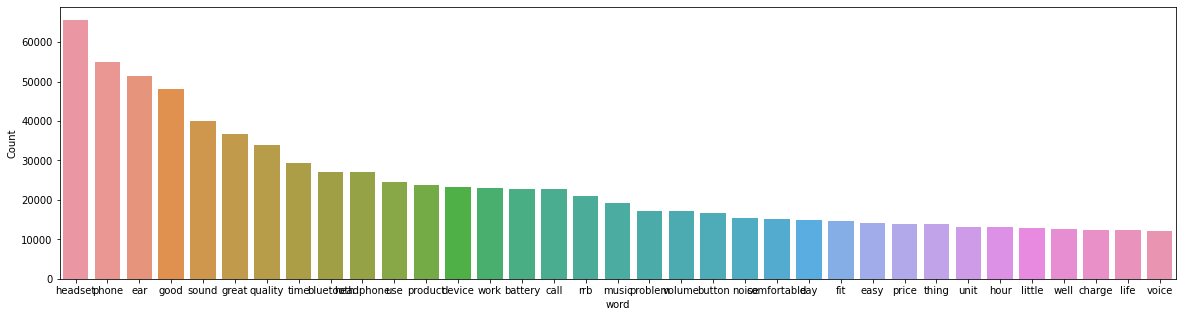

In [38]:
freq_words(bluetooth['reviews'], 35)

#### Removing any URLs in the reviews

In [39]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)



# remove all urls from df
import re
import string

bluetooth['reviews'] = bluetooth['reviews'].apply(lambda x: remove_url(x))

#### Removing html tags from the text

In [40]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)



# remove all html tags from df
bluetooth['reviews'] = bluetooth['reviews'].apply(lambda x: remove_html(x))

#### Removing emojis and emoticons

In [41]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove all emojis from df
bluetooth['reviews'] = bluetooth['reviews'].apply(lambda x: remove_emoji(x))

In [42]:
# !pip3 install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
    return emoticon_pattern.sub(r'', text)



# bluetooth['reviews'] = bluetooth['reviews'].apply(lambda x: remove_emoticons(x))

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/572722228.py:7: DeprecationWarning: invalid escape sequence \(
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/572722228.py:7: DeprecationWarning: invalid escape sequence \|
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/572722228.py:7: DeprecationWarning: invalid escape sequence \)
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [43]:
# correction of the words spelling - not done at it is taking  lot of time to run
# from textblob import TextBlob
# bluetooth['reviews'].apply(lambda x: str(TextBlob(x).correct()))

            word  count
0        headset  65619
23         phone  54991
153          ear  51468
42          good  48131
34         sound  40118
101        great  36634
35       quality  33940
106         time  29421
8      bluetooth  27124
263    headphone  26987
57           use  24443
107      product  23804
9         device  23218
80          work  22937
206      battery  22802
27          call  22757
56           rrb  20957
464        music  19220
22       problem  17139
40        volume  17120
26        button  16769
95         noise  15439
301  comfortable  15103
125          day  14976
59           fit  14744
208         easy  14171
109        price  13846
77         thing  13823
164         unit  13195
346         hour  13033


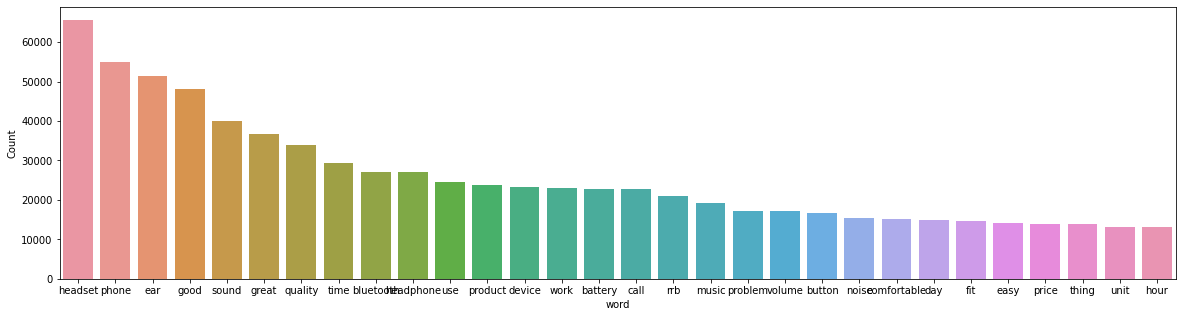

In [44]:
freq_words(bluetooth['reviews'])

In [45]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/2170350517.py:4: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1875/2170350517.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [46]:


bluetooth['reviews'] = bluetooth['reviews'].apply(round1)
bluetooth['reviews']



0                                   headset circuit city last trip actiontec site prereq bluetooth device nokia headset customer support headset support actiontec money list compatible celphone respect client
1                                                         bluetooth headset comment actiontec website much problem phone press answer button headset call headset signal poor sure problem phone trouble headset
2        lightweight tiny sound quality person well phone tin earpiece volume loud quality good adjustable boom mic point right side face flat follow curve head fact curve mine rrb side use annoying fit ad...
3                                                        work phone able pair phone fine bluetooth voice dial correct number talk people static left message car alot background noise handset bad talk wife use
4                                                                                                                            item work setup headset phone sound qua

            word  count
0        headset  65619
23         phone  54991
153          ear  51468
42          good  48131
34         sound  40118
101        great  36634
35       quality  33940
106         time  29421
8      bluetooth  27124
263    headphone  26987
57           use  24443
107      product  23804
9         device  23218
80          work  22937
206      battery  22802
27          call  22757
56           rrb  20957
464        music  19220
22       problem  17139
40        volume  17120
26        button  16769
95         noise  15439
301  comfortable  15103
125          day  14976
59           fit  14744
208         easy  14171
109        price  13846
77         thing  13823
164         unit  13195
346         hour  13033


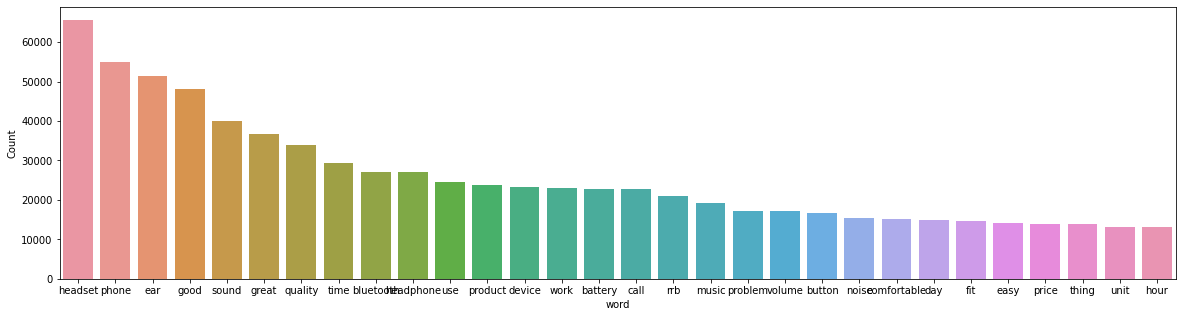

In [47]:
freq_words(bluetooth['reviews'])

In [48]:


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)



In [49]:


bluetooth['reviews'] = bluetooth['reviews'].apply(round2)
bluetooth['reviews']



0                                   headset circuit city last trip actiontec site prereq bluetooth device nokia headset customer support headset support actiontec money list compatible celphone respect client
1                                                         bluetooth headset comment actiontec website much problem phone press answer button headset call headset signal poor sure problem phone trouble headset
2        lightweight tiny sound quality person well phone tin earpiece volume loud quality good adjustable boom mic point right side face flat follow curve head fact curve mine rrb side use annoying fit ad...
3                                                        work phone able pair phone fine bluetooth voice dial correct number talk people static left message car alot background noise handset bad talk wife use
4                                                                                                                            item work setup headset phone sound qua

In [50]:
bluetooth['word_count'] = bluetooth['reviews'].apply(lambda x: len(str(x).split(" ")))
bluetooth[['reviews','word_count']].head()

,reviews,word_count
0,headset circuit city last trip actiontec site prereq bluetooth device nokia headset customer support headset support actiontec money list compatible celphone respect client,23
1,bluetooth headset comment actiontec website much problem phone press answer button headset call headset signal poor sure problem phone trouble headset,21
2,lightweight tiny sound quality person well phone tin earpiece volume loud quality good adjustable boom mic point right side face flat follow curve head fact curve mine rrb side use annoying fit ad...,63
3,work phone able pair phone fine bluetooth voice dial correct number talk people static left message car alot background noise handset bad talk wife use,25
4,item work setup headset phone sound quality great size weight confortable long time,13


            word  count
0        headset  65619
23         phone  54991
153          ear  51468
42          good  48131
34         sound  40118
101        great  36634
35       quality  33940
106         time  29421
8      bluetooth  27124
263    headphone  26987
57           use  24443
107      product  23804
9         device  23218
80          work  22937
206      battery  22802
27          call  22757
56           rrb  20957
464        music  19220
22       problem  17139
40        volume  17120
26        button  16769
95         noise  15439
301  comfortable  15103
125          day  14976
59           fit  14744
208         easy  14171
109        price  13846
77         thing  13823
164         unit  13195
346         hour  13033


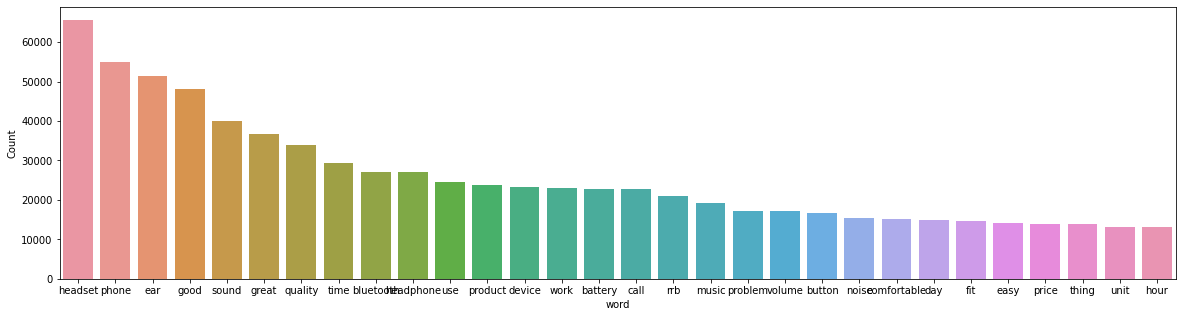

In [51]:
freq_words(bluetooth['reviews'])

In [52]:
bluetooth.to_csv('bluetooth_processed.csv')

In [53]:
bluetooth

,Unnamed: 0,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count
0,0,B00011FIBO-0000,0,headset circuit city last trip actiontec site prereq bluetooth device nokia headset customer support headset support actiontec money list compatible celphone respect client,29,0,0,0,4,23
1,1,B00011FIBO-0001,0,bluetooth headset comment actiontec website much problem phone press answer button headset call headset signal poor sure problem phone trouble headset,56,0,0,0,7,21
2,2,B00011FIBO-0002,2,lightweight tiny sound quality person well phone tin earpiece volume loud quality good adjustable boom mic point right side face flat follow curve head fact curve mine rrb side use annoying fit ad...,100,0,0,0,14,63
3,3,B00011FIBO-0003,2,work phone able pair phone fine bluetooth voice dial correct number talk people static left message car alot background noise handset bad talk wife use,64,0,0,0,8,25
4,4,B00011FIBO-0004,3,item work setup headset phone sound quality great size weight confortable long time,32,0,0,0,3,13
...,...,...,...,...,...,...,...,...,...,...
80143,80143,B00JFLAEO2-0001,1,editin response user ear pad design common noise rrb headphone ear effective comfort soft memory foam material less pressure headband head big hour pain glass chance headset mdr reason star good s...,206,0,0,0,42,182
80144,80144,B00JFLAEO2-0002,1,previous low price bluetooth version costco awesome noise cancellation comfort tooth direct former reviewer convenience few dongle cable uncomfortable normal size head normal shape configuration h...,77,1,1,0,37,103
80145,80145,B00JFLAEO2-0003,2,sound fine next massive construction site apartment crazy noise good fine sitting move slip head normal medium sized toyed idea gym way price stay head,64,1,1,0,6,25
80146,80146,B00JFLAEO2-0004,3,work complaint come case different brand,15,0,0,0,3,6


In [54]:
!pip3 install -q wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [55]:
text_for_cloud = " ".join(word for word in bluetooth.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 17282413 words in the combination of all reviews.


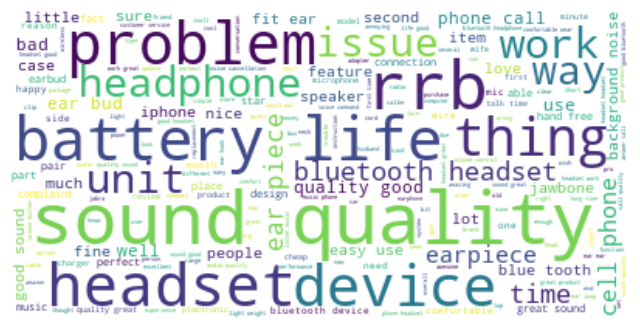

In [56]:
from matplotlib.pyplot import figure

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
freq_of_words = pd.Series(' '.join(bluetooth['reviews']).split()).value_counts()[:40]
freq_of_words

headset        65619
phone          54991
ear            51468
good           48131
sound          40118
great          36634
quality        33940
time           29421
bluetooth      27124
headphone      26987
use            24443
product        23804
device         23218
work           22937
battery        22802
call           22757
rrb            20957
music          19220
problem        17139
volume         17120
button         16769
noise          15439
comfortable    15103
day            14976
fit            14744
easy           14171
price          13846
thing          13823
unit           13195
hour           13033
little         12760
well           12694
charge         12308
life           12301
voice          12080
people         11233
small          10620
iphone         10222
pair           10096
issue          10019
dtype: int64